# OpenAI Gym 및 시각화를 위한 라이브러리 설치

In [79]:
%%bash
# Install additional packages for visualization
sudo apt-get update
sudo apt-get install -y xvfb python-opengl > /dev/null 2>&1
pip install pyvirtualdisplay > /dev/null 2>&1
pip install git+https://github.com/tensorflow/docs > /dev/null 2>&1
pip install gym[classic_control]

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:6 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:10 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Fetched 261 kB in 1s (244 kB/s)
Reading package li

# 진행상태 시각화

In [80]:
from tqdm import tqdm

# OpenAI Gym 및 시각화를 위한 라이브러리 import

In [81]:
from IPython import display as ipythondisplay
from PIL import Image
from pyvirtualdisplay import Display

In [82]:
import gym
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

# FrozenLake 환경 설정

In [83]:
env = gym.make('FrozenLake-v1')

/usr/local/lib/python3.8/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [84]:
# Render한 결과를 gif로 저장
display = Display(visible=0, size=(400, 300))
display.start()

# Q-Table 방식의 Q-Learning을 이용한 학습

In [85]:
# 전체 Q-Tale의 값을 0으로 초기화
n, m = env.observation_space.n, env.action_space.n
Q = np.zeros([n, m])

In [86]:
# 학습을 위한 파라미터 설정
lr = .8
y = .95
num_episodes = 5000

In [87]:
# 리워드를 저장할 리스트
result_list = []

In [88]:
# 이미지를 저장할 리스트
image_list = []

In [89]:
for i in tqdm(range(num_episodes)):
  # 새로운 환경 생성
  state = env.reset()
  reward = 0
  is_terminated = False

  # 각각의 episode 마다 최대 n번 움직임
  for j in range(100):
    # 약간의 노이즈(Exploration을 위해)와 함께 가장 Q가 큰 행동을 선택
    next_action = np.argmax(Q[state,:] + np.random.randn(1, m)*(1./(i+1)))

    cur_state, cur_reward, is_terminated, _ = env.step(next_action)

    Q[state,next_action] = Q[state,next_action] + lr*(cur_reward + y*np.max(Q[cur_state,:]) - Q[state,next_action])

    # 도착했으면 종료
    if is_terminated:
      reward = cur_reward
      break

    # state 업데이트
    state = cur_state
  
  # episode 결과 업데이트
  result_list.append(reward)


100%|██████████| 5000/5000 [00:08<00:00, 608.50it/s]


In [90]:
arrived_percent = sum(result_list) / num_episodes
print('학습 과정에서의 성공 확률', arrived_percent)

학습 과정에서의 성공 확률 0.5532


In [91]:
result_list = []

for i in tqdm(range(num_episodes)):
  # 새로운 환경 생성
  state = env.reset()
  reward = 0
  is_terminated = False

  # 각각의 episode 마다 최대 n번 움직임
  for j in range(100):
    # 약간의 노이즈(Exploration을 위해)와 함께 가장 Q가 큰 행동을 선택
    next_action = np.argmax(Q[state,:])

    # 마지막 10개의 episode를 gif로 저장하기 위해 render
    if i > 4990:
        screen = env.render(mode='rgb_array')
        image_list.append(Image.fromarray(screen))

    cur_state, cur_reward, is_terminated, _ = env.step(next_action)

    # 도착했으면 종료
    if is_terminated:
      reward = cur_reward
      break

    # state 업데이트
    state = cur_state
  
  # episode 결과 업데이트
  result_list.append(reward)


100%|█████████▉| 4982/5000 [00:04<00:00, 1135.49it/s]/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
100%|██████████| 5000/5000 [00:04<00:00, 1066.16it/s]


In [92]:
arrived_percent = sum(result_list) / num_episodes
print('학습 완료 후 성공 확률', arrived_percent)

학습 완료 후 성공 확률 0.6278


# Q 테이블 표

In [93]:
print(np.round(Q,3))

[[0.274 0.005 0.003 0.005]
 [0.    0.    0.    0.206]
 [0.141 0.001 0.001 0.002]
 [0.001 0.    0.    0.002]
 [0.389 0.    0.002 0.   ]
 [0.    0.    0.    0.   ]
 [0.111 0.    0.    0.   ]
 [0.    0.    0.    0.   ]
 [0.001 0.    0.001 0.619]
 [0.    0.678 0.    0.001]
 [0.297 0.    0.    0.001]
 [0.    0.    0.    0.   ]
 [0.    0.    0.    0.   ]
 [0.    0.    0.86  0.   ]
 [0.    0.    0.974 0.   ]
 [0.    0.    0.    0.   ]]


In [94]:
# Render한 결과를 gif로 저장합니다.
image_file = 'frozenlake-v0-q-table.gif'
# duration=1: 각 frame을 1ms 속도로 실행합니다.
image_list[0].save(image_file, save_all=True, append_images=image_list[1:], duration=1)

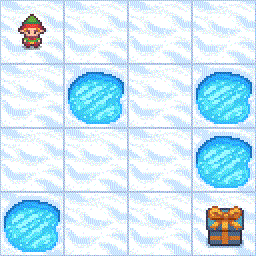

In [95]:
from IPython.display import Image as disImage
disImage(open(image_file,'rb').read())